## The Quantization of the image

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def uniform_quantization(image, num_levels):
    """
    Perform uniform quantization on an image.

    Returns:
        quantized_image (numpy array): Quantized image array.
        step_size (float): Step size used for quantization.
    """
    image = np.asarray(image, dtype=np.float32)  

    
    img_min, img_max = np.min(image), np.max(image)

 
    step_size = (img_max - img_min) / num_levels

    # Perform quantization
    quantized_image = np.floor((image - img_min) / step_size) * step_size + img_min

    return quantized_image, step_size

## Dequantization of the Image

In [2]:
def decompress_image(quantized_image, step_size):
    """
    Decompress a quantized image by reversing the quantization step.


    Returns:
        decompressed_image (numpy array): Decompressed image array.
    """
    decompressed_image = quantized_image + (step_size / 2)
    return np.clip(decompressed_image, 0, 255).astype(np.uint8)

In [4]:
def calculate_mse(original, decompressed):
    """
    Calculate the Mean Squared Error between the original and decompressed images.
    
    Returns:
        mse: Mean Squared Error value.
    """
    return np.mean((original - decompressed) ** 2)


In [ ]:
if __name__ == "__main__":
    # Load the image
    image = Image.open(r"C:\Users\LENOVO\Pictures\Screenshots\compreesion.png")  
    image_array = np.array(image)

    num_levels = 8  

   
    quantized_image, step_size = uniform_quantization(image_array, num_levels)

   
    decompressed_image = decompress_image(quantized_image, step_size)

    # compression rate
    original_size = image_array.size * image_array.itemsize
    quantized_size = quantized_image.size * quantized_image.itemsize
    compression_rate = original_size / quantized_size

    # MSE
    mse = calculate_mse(image_array, decompressed_image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Step Size: 31.875
Compression Rate: 0.25
Mean Squared Error (MSE): 60.03


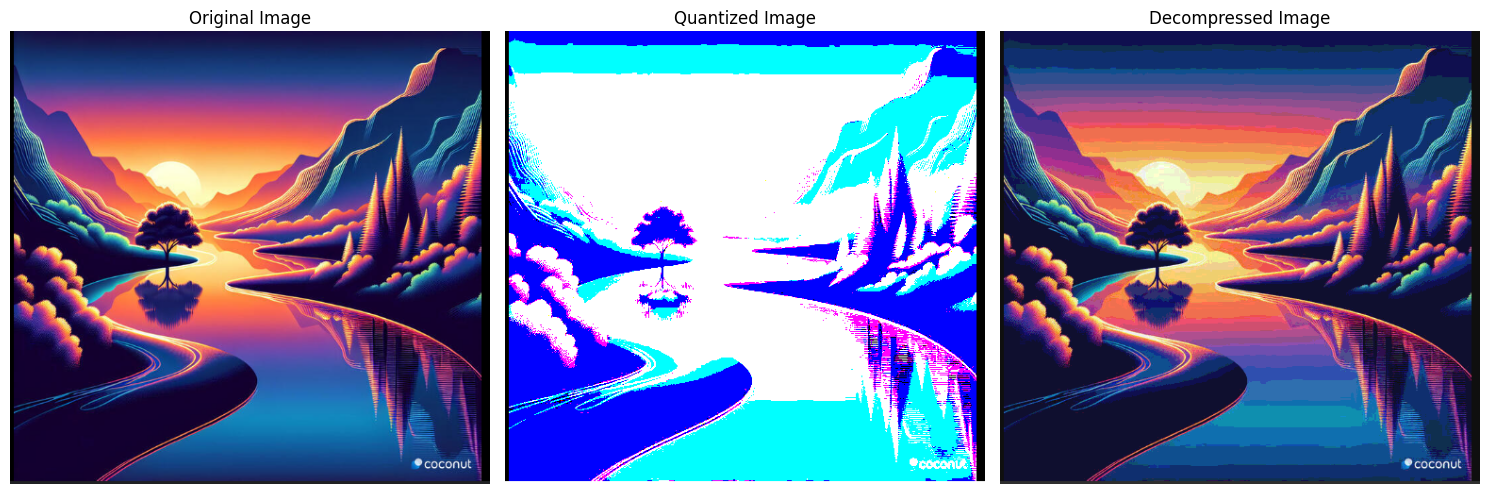

In [7]:

print(f"Step Size: {step_size}")
print(f"Compression Rate: {compression_rate:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

   
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Quantized Image")
plt.imshow(quantized_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Decompressed Image")
plt.imshow(decompressed_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

